In [35]:
# Clustering -- Unsupervised learning 

# Finding patterns in data , based on the pattern create groups and assign the pattern(object) to that group

# In logistic regression the data itself has the predefined group , 
# hence based on the dependent variable we classify it to any of the predefined group 
# Logistic Regression --> A supervised learning

# How do we form clusters:
    # We find the distance between the data points , based on that result , we group(cluster) it.
        # Euclidean distance 
        # Manhattan distance
        # Minkowiski distance


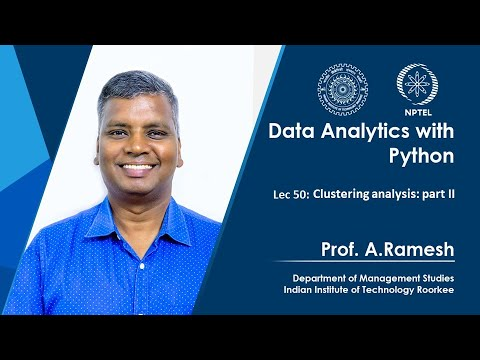

In [79]:

    
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=16, seconds=13).total_seconds())

YouTubeVideo('ULFVKARh6is', width=800, height=600 , start=start, autoplay=1, theme="light", color="red")

In [36]:
import pandas as pd
person = ['A','B','C','D','E','F','G','H']
raw_data = {
    'Weight(Kgs)':[15,49,13,45,85,66,12,10],
    'Height(cms)':[95,156,95,160,178,176,90,78]
}
data= pd.DataFrame(raw_data,index=person)
data

,Weight(Kgs),Height(cms)
A,15,95
B,49,156
C,13,95
D,45,160
E,85,178
F,66,176
G,12,90
H,10,78


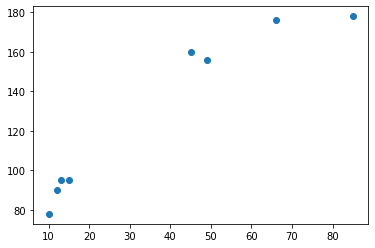

In [37]:
import matplotlib.pyplot as plt 
plt.scatter(x='Weight(Kgs)', y= 'Height(cms)',data=data)
plt.show()

***** We can clearly see to cluster in the given data . 
ACGH forms one cluster 
BDEF forms the other 

# Lets examine the distance between and around them 

In [38]:
# if we find the euclidean distance between B and E 
import numpy as np
dis = np.sqrt((85-49)**2+(178-156)**2)
print('Euclidean distance' , dis)

Euclidean distance 42.190046219457976


# Using Scipy 

In [53]:
import scipy.spatial as ss
# x=np.array(data['Weight(Kgs)']).reshape(1,-1)
# y=np.array(data['Height(cms)']).reshape(1,-1)

# x=np.array(data['Weight(Kgs)']).reshape(1,-1)
# y=np.array(data['Height(cms)']).reshape(1,-1)
x=np.array([85,178]).reshape(1,-1)
y=np.array([49,156]).reshape(1,-1)

ss.distance_matrix(x, y)



array([[42.19004622]])

In [76]:
# Forming whole distance matrix 

def calculate_euclidean_distance(first_data,second_data):
    x=first_data.reshape(1,-1)
    y=second_data.reshape(1,-1)

    return round(ss.distance_matrix(x, y)[0][0],2)

    
res = []
for i in data.index:
    res_2 = []
    for j in data.index:
        #print(i , j)
        x1=data.loc[i]['Weight(Kgs)']
        x2=data.loc[j]['Weight(Kgs)']
        y1=data.loc[i]['Height(cms)']
        y2=data.loc[j]['Height(cms)']
        
        first_data=np.array([x1,y1])
        second_data=np.array([x2,y2])
        res_1 = calculate_euclidean_distance(first_data,second_data)
        res_2.append(res_1)
    res.append(np.array(res_2))

        
final = np.hstack(res)    
final.resize(8,8)
final
    
    

array([[  0.  ,  69.84,   2.  ,  71.59, 108.58,  95.72,   5.83,  17.72],
       [ 69.84,   0.  ,  70.83,   5.66,  42.19,  26.25,  75.66,  87.21],
       [  2.  ,  70.83,   0.  ,  72.45, 109.88,  96.8 ,   5.1 ,  17.26],
       [ 71.59,   5.66,  72.45,   0.  ,  43.86,  26.4 ,  77.39,  89.16],
       [108.58,  42.19, 109.88,  43.86,   0.  ,  19.1 , 114.34, 125.  ],
       [ 95.72,  26.25,  96.8 ,  26.4 ,  19.1 ,   0.  , 101.55, 112.87],
       [  5.83,  75.66,   5.1 ,  77.39, 114.34, 101.55,   0.  ,  12.17],
       [ 17.72,  87.21,  17.26,  89.16, 125.  , 112.87,  12.17,   0.  ]])

In [69]:
# Convert the numpy array of the distance matric to dataframe for better view

import numpy as np 
import pandas as pd 
person = ['A','B','C','D','E','F','G','H']
X = np.array([
    [  0.  ,  69.84,   2.  ,  71.59, 108.58,  95.72,   5.83,  17.72],
       [ 69.84,   0.  ,  70.83,   5.66,  42.19,  26.25,  75.66,  87.21],
       [  2.  ,  70.83,   0.  ,  72.45, 109.88,  96.8 ,   5.1 ,  17.26],
       [ 71.59,   5.66,  72.45,   0.  ,  43.86,  26.4 ,  77.39,  89.16],
       [108.58,  42.19, 109.88,  43.86,   0.  ,  19.1 , 114.34, 125.  ],
       [ 95.72,  26.25,  96.8 ,  26.4 ,  19.1 ,   0.  , 101.55, 112.87],
       [  5.83,  75.66,   5.1 ,  77.39, 114.34, 101.55,   0.  ,  12.17],
       [ 17.72,  87.21,  17.26,  89.16, 125.  , 112.87,  12.17,   0.  ]
])
index = person
cols = person
X = pd.DataFrame(X,index=index,columns=cols)

X

,A,B,C,D,E,F,G,H
A,0.00,69.84,2.00,71.59,108.58,95.72,5.83,17.72
B,69.84,0.00,70.83,5.66,42.19,26.25,75.66,87.21
C,2.00,70.83,0.00,72.45,109.88,96.80,5.10,17.26
D,71.59,5.66,72.45,0.00,43.86,26.40,77.39,89.16
E,108.58,42.19,109.88,43.86,0.00,19.10,114.34,125.00
F,95.72,26.25,96.80,26.40,19.10,0.00,101.55,112.87
G,5.83,75.66,5.10,77.39,114.34,101.55,0.00,12.17
H,17.72,87.21,17.26,89.16,125.00,112.87,12.17,0.00


# Euclidean distance between object A to A is zero 
# A to B  is 69.4 which is equal to B to A 


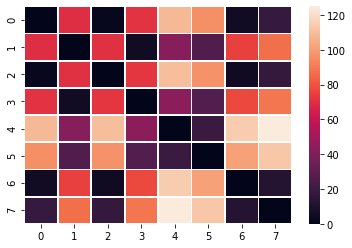

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


ax = sns.heatmap(final, linewidth=0.8)
plt.show()

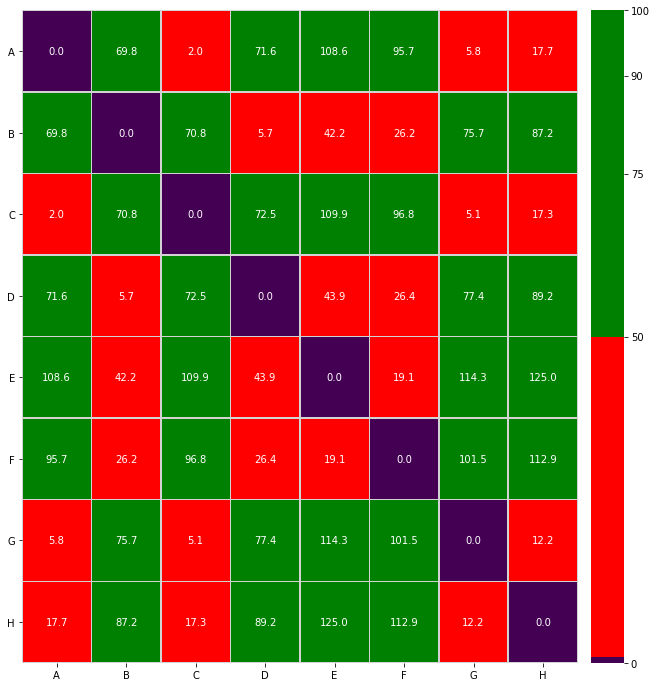

In [88]:
# Making better visibilty of clusters by custom heat map 

# use the new color map
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

# define 100 colors using an existing color map
newcolors = plt.get_cmap('viridis',100).colors

# assign new colors of interest
# newcolors[:1,: ]= colors.to_rgba('blue')  # To highlight the diagonal zero 
newcolors[ 1 : 50, :] = colors.to_rgba('red')
newcolors[50: 100, :] = colors.to_rgba('green')
# newcolors[75: 90, :] = colors.to_rgba('orange')
# newcolors[90:100, :] = colors.to_rgba('green')

# create the customized color map
mycmap = colors.ListedColormap(newcolors)


fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(
    data=X,
    ax=ax,
    vmax=100, vmin=0,
    cmap=mycmap,
    linewidths=.5, 
    linecolor='lightgray',
    annot=True, 
    fmt=".1f",
    cbar_kws={
        'pad': .02, 
        'ticks': [0, 50,75,90,100],
    },
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0);